In [1]:
words_choice = ['우한', '중국', '미국', '일본', '유럽', '국제', '세계',
                '신천지', '교회', '예배', '기독교', '종교',
                '정책', '지원금', '정부',
                '재택근무', '고용', '실업', '휴업', '해고', '채용',
                '인강', '등교', '개학', '인터넷강의', '학교', '유치원', '교육',
                '우울증', '코로나블루', '일상', '심리', '취미', '소비',
                '포스트코로나', '미래', '변화', '영향']

In [2]:
# 트위터 월별 데이터 2차원 리스트로 변환
from konlpy.tag import Hannanum
from tqdm import tqdm_notebook
temp_re=[]
def temp_re_made(m,d):
    for i in tqdm_notebook(range(d+1)[1:]):
        f=open(f'c:/data/twitter/kor/twitter_{m}m{i}d.txt', encoding='utf-8')
        lines = f.readlines() 
        f.close()

        han=Hannanum() #한나눔 패키지
        temp=[]
        for j in range(len(lines)):
            a=lines[j].strip() #공백,줄바꿈,탭 제거
            b = han.nouns(a)
            c = list(filter(lambda x : x in words_choice, b))
            if len(c) != 0:
                temp.extend(c)
            else:
                pass
        temp_re.append(temp)

In [3]:
temp_re_made(1,31)
temp_re_made(2,29)
temp_re_made(3,31)
temp_re_made(4,30)
temp_re_made(5,31)
temp_re_made(6,30)

In [4]:
len(temp_re)

182

In [5]:
docs = temp_re
vocab = words_choice

In [6]:
from math import log
N=len(docs) #문서의 갯수

# tf - 문서 내에서 단어의 출현 횟수
def tf(t,d):
    return d.count(t)

# df : 특정 단어가 등장한 문서의 수
# idf : df에 반비례하는 수
def idf(t):
    df=0
    for doc in docs:
        df += t in doc
    return log(N/(df+1))

# tfidf : tf와 idf를 곱한 값
def tfidf(t,d):
    return tf(t,d) * idf(t)

In [7]:
import pandas as pd
result=[]
for i in range(N):
    result.append([])
    d=docs[i] #i번째 문서
    for j in range(len(vocab)): 
        t=vocab[j]#개별 단어
        result[-1].append(tf(t,d)) #tf 추가 추가

df_tf=pd.DataFrame(result, columns=vocab)

In [8]:
#idf 계산
result=[]
for j in range(len(vocab)):
    t=vocab[j]
    result.append(idf(t))

df_idf=pd.DataFrame(result,index=vocab, columns=['IDF'])

In [9]:
#tfidf 계산- 값이 크면 중요도가 높고 값이 작으면 중요도가 낮은 단어
from tqdm import tqdm_notebook

result=[]
for i in tqdm_notebook(range(N)):
    result.append([])
    d=docs[i]
    for j in range(len(vocab)):
        t=vocab[j]
        result[-1].append(tfidf(t,d))
        
df_tfidf=pd.DataFrame(result, columns=vocab)  

In [10]:
df_tfidf

우한        중국        미국        일본        유럽   국제        세계  \
0    0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.000000   
1    0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.000000   
2    0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.000000   
3    0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.539066   
4    0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.000000   
..        ...       ...       ...       ...       ...  ...       ...   
177  1.499319  1.067871  1.363638  0.000000  0.000000  0.0  0.269533   
178  1.499319  0.213574  0.000000  0.000000  0.000000  0.0  0.269533   
179  0.000000  0.000000  0.227273  0.000000  0.000000  0.0  0.269533   
180  0.000000  0.854296  0.000000  0.830259  1.215023  0.0  0.539066   
181  0.000000  0.427148  0.909092  0.000000  1.215023  0.0  0.539066   

           신천지        교회   예배  ...  우울증  코로나블루        일상   심리   취미        소비  \
0     0.000000  0.000000  0.0  ...  0.0    0.0  0.000000  0.0  0.0  0.000000   
1     0.000000  0.000000  0.0  ...  0.0    0.0  0.000000  0.0  0.0  0.000000   
2     0.000000  0.000000  0.0  ...  0.0    0.0  0.000000  0.0  0.0  0.000000   
3     0.000000  0.000000  0.0  ...  0.0    0.0  0.000000  0.0  0.0  0.000000   
4     0.000000  0.000000  0.0  ...  0.0    0.0  1.233715  0.0  0.0  0.000000   
..         ...       ...  ...  ...  ...    ...       ...  ...  ...       ...   
177   0.000000  2.219324  0.0  ...  0.0    0.0  1.233715  0.0  0.0  0.000000   
178   0.550046  0.000000  0.0  ...  0.0    0.0  1.233715  0.0  0.0  0.000000   
179  15.401297  3.328986  0.0  ...  0.0    0.0  1.233715  0.0  0.0  0.000000   
180   3.300278  1.109662  0.0  ...  0.0    0.0  0.000000  0.0  0.0  1.836711   
181   0.550046  0.000000  0.0  ...  0.0    0.0  1.233715  0.0  0.0  3.673422   

     포스트코로나        미래        변화        영향  
0       0.0  0.000000  0.000000  0.000000  
1       0.0  0.000000  0.000000  0.000000  
2       0.0  0.000000  0.000000  0.000000  
3       0.0  0.000000  0.000000  0.000000  
4       0.0  0.000000  0.000000  0.000000  
..      ...       ...       ...       ...  
177     0.0  1.677646  0.000000  0.000000  
178     0.0  0.000000  1.871802  0.000000  
179     0.0  0.000000  5.615407  1.773037  
180     0.0  1.677646  0.000000  0.886519  
181     0.0  0.000000  0.000000  0.886519  

[182 rows x 38 columns]

In [11]:
words_choice = ['우한', '중국', '미국', '일본', '유럽', '국제', '세계',
                '신천지', '교회', '예배', '기독교', '종교',
                '정책', '지원금', '정부',
                '재택근무', '고용', '실업', '휴업', '해고', '채용',
                '인강', '등교', '개학', '인터넷강의', '학교', '유치원', '교육',
                '우울증', '코로나블루', '일상', '심리', '취미', '소비',
                '포스트코로나', '미래', '변화', '영향']

In [12]:
df_summary = pd.DataFrame(df_tfidf[['우한', '중국', '미국', '일본', '유럽', '국제', '세계']].sum(axis=1),columns=['국제'])
df_summary['종교'] = pd.DataFrame(df_tfidf[['신천지', '교회', '예배', '기독교', '종교']].sum(axis=1))
df_summary['정책'] = pd.DataFrame(df_tfidf[['정책', '지원금', '정부']].sum(axis=1))
df_summary['고용'] = pd.DataFrame(df_tfidf[['재택근무', '고용', '실업', '휴업', '해고', '채용']].sum(axis=1))
df_summary['교육'] = pd.DataFrame(df_tfidf[['인강', '등교', '개학', '인터넷강의', '학교', '유치원', '교육']].sum(axis=1))
df_summary['일상'] = pd.DataFrame(df_tfidf[['우울증', '코로나블루', '일상', '심리', '취미', '소비']].sum(axis=1))
df_summary['미래'] = pd.DataFrame(df_tfidf[['포스트코로나', '미래', '변화', '영향']].sum(axis=1))

df_summary = df_summary.set_index(pd.date_range('2020-1-1',periods=182))
df_summary

국제         종교        정책        고용        교육        일상  \
2020-01-01  0.000000   0.000000  0.000000  0.000000  0.000000  0.000000   
2020-01-02  0.000000   0.000000  0.000000  0.000000  0.000000  0.000000   
2020-01-03  0.000000   0.000000  0.000000  0.000000  0.000000  0.000000   
2020-01-04  0.539066   0.000000  0.000000  0.000000  0.000000  0.000000   
2020-01-05  0.000000   0.000000  0.000000  0.000000  0.000000  1.233715   
...              ...        ...       ...       ...       ...       ...   
2020-06-26  4.200360   2.219324  0.000000  0.000000  0.913547  1.233715   
2020-06-27  1.982426   0.550046  0.539066  0.000000  0.913547  1.233715   
2020-06-28  0.496806  18.730284  0.539066  2.208274  2.740642  1.233715   
2020-06-29  3.438644   4.409940  0.269533  0.000000  5.767153  1.836711   
2020-06-30  3.090328   0.550046  0.808598  0.000000  1.375365  4.907136   

                  미래  
2020-01-01  0.000000  
2020-01-02  0.000000  
2020-01-03  0.000000  
2020-01-04  0.000000  
2020-01-05  0.000000  
...              ...  
2020-06-26  1.677646  
2020-06-27  1.871802  
2020-06-28  7.388444  
2020-06-29  2.564165  
2020-06-30  0.886519  

[182 rows x 7 columns]

C:\Users\analysis\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


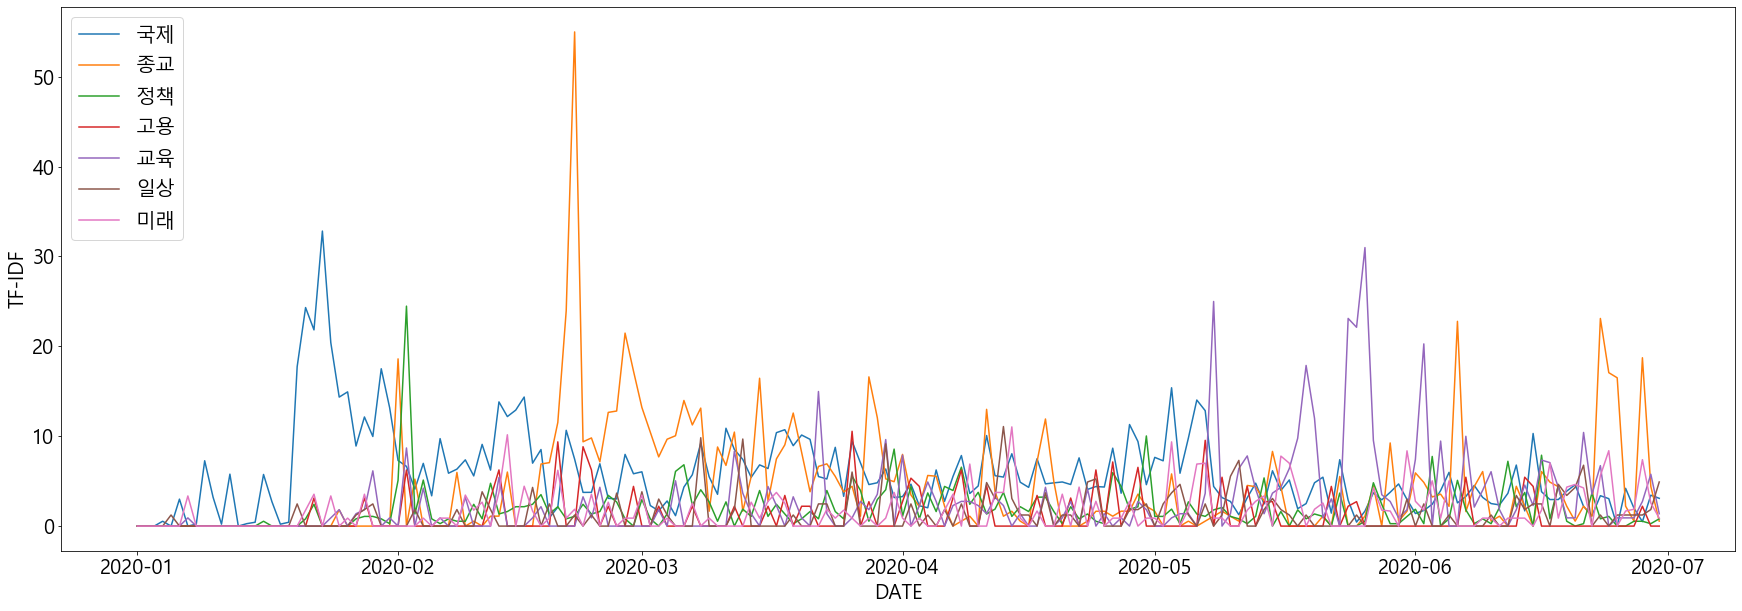

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name, size = 20)
plt.figure(figsize=(30,10))
plt.plot(df_summary)
plt.xlabel('DATE')
plt.ylabel('TF-IDF')
plt.legend(df_summary.columns, loc='upper left')
plt.show()

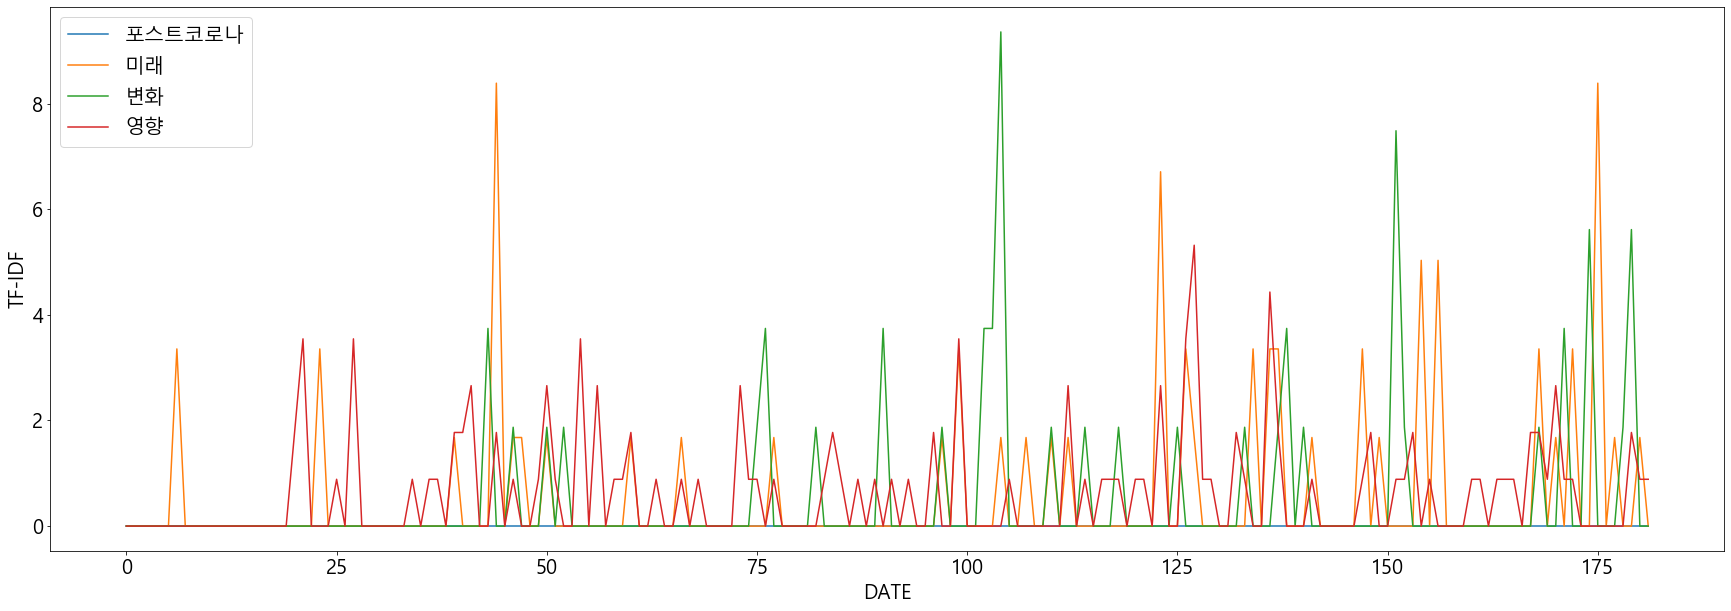

In [36]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name, size = 20)
plt.figure(figsize=(30,10))
plt.plot(df_tfidf[['포스트코로나', '미래', '변화', '영향']])
plt.xlabel('DATE')
plt.ylabel('TF-IDF')
plt.legend(['포스트코로나', '미래', '변화', '영향'], loc='upper left')
plt.show()

In [15]:
import plotly.offline as py
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot

In [16]:
def future_graph(df):
    #Prophet에선 기본적으로 트렌드가 변경되는 지점을 자동으로 감지해 트렌드를 예측해준다.
    m = Prophet(
        changepoint_prior_scale=0.5, #Change Point의 유연성을 조정하는 방법: 디폴트는 0.05(값이 커질수록 유연해진다)
        changepoint_range=0.9, # 기본적으로 Prophet은 시계열 데이터의 80% 크기에서 잠재적으로 ChangePoint를 지정해주지만 90%로 설정해준다.
    )
    m.fit(df)
    #미래 dataframe
    future = m.make_future_dataframe(periods=30)#현재까지의 날짜로부터 30일의 미래
    forecast = m.predict(future)
    fig = plot_plotly(m, forecast)
    py.iplot(fig)
    #점이 없이 선만 있는 부분이 예측된 미래

In [17]:
df_forcast1 = pd.DataFrame(df_summary[['국제']])
df_forcast1.reset_index(inplace=True)
df_forcast1.columns = ['ds','y']

In [18]:
df_forcast2 = pd.DataFrame(df_summary[['종교']])
df_forcast2.reset_index(inplace=True)
df_forcast2.columns = ['ds','y']

In [19]:
df_forcast3 = pd.DataFrame(df_summary[['정책']])
df_forcast3.reset_index(inplace=True)
df_forcast3.columns = ['ds','y']

In [20]:
df_forcast4 = pd.DataFrame(df_summary[['고용']])
df_forcast4.reset_index(inplace=True)
df_forcast4.columns = ['ds','y']

In [21]:
df_forcast5 = pd.DataFrame(df_summary[['교육']])
df_forcast5.reset_index(inplace=True)
df_forcast5.columns = ['ds','y']

In [22]:
df_forcast6 = pd.DataFrame(df_summary[['일상']])
df_forcast6.reset_index(inplace=True)
df_forcast6.columns = ['ds','y']

In [23]:
df_forcast7 = pd.DataFrame(df_summary[['미래']])
df_forcast7.reset_index(inplace=True)
df_forcast7.columns = ['ds','y']

In [24]:
future_graph(df_forcast1)
#국제

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [25]:
future_graph(df_forcast2)
#종교

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [26]:
future_graph(df_forcast3)
#정책

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [27]:
future_graph(df_forcast4)
#고용

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [28]:
future_graph(df_forcast5)
#교육

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [29]:
future_graph(df_forcast6)
#일상

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [30]:
future_graph(df_forcast7)
#미래

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
